<a href="https://colab.research.google.com/github/Marriyam/TEVTA-AI-ML/blob/main/Decision_tree_with_entropy_(weather_DS)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV


In [ ]:
df = pd.read_excel('/content/weather.xlsx')


In [ ]:
X=df.drop('Play Football',axis=1)
y=df['Play Football']


In [ ]:
le=LabelEncoder()
X=X.apply(le.fit_transform)
X

,Day,Weather,Temperature,Humidity,Wind
0,0,2,1,0,1
1,6,2,1,0,0
2,7,0,1,0,1
3,8,1,2,0,1
4,9,1,0,1,1
5,10,1,0,1,0
6,11,0,0,1,0
7,12,2,2,0,1
8,13,2,0,1,1
9,1,1,2,1,1


In [ ]:
DT = DecisionTreeClassifier(criterion="entropy", max_depth=3)
DT = DT.fit(X,y)
y_pred = DT.predict(X)
print("Accuracy:",metrics.accuracy_score(y, y_pred))


Accuracy: 0.8571428571428571


In [ ]:
test = np.array([[8, 1, 2, 0, 1]])
test=test.reshape(1, -1)
predicted = DT.predict(test)

print("Predicted Value:", predicted)
if(predicted==1):
  print("\nWould Play Football")
else:
  print("\nWould not Play Football\n")

Predicted Value: ['No']

Would not Play Football



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


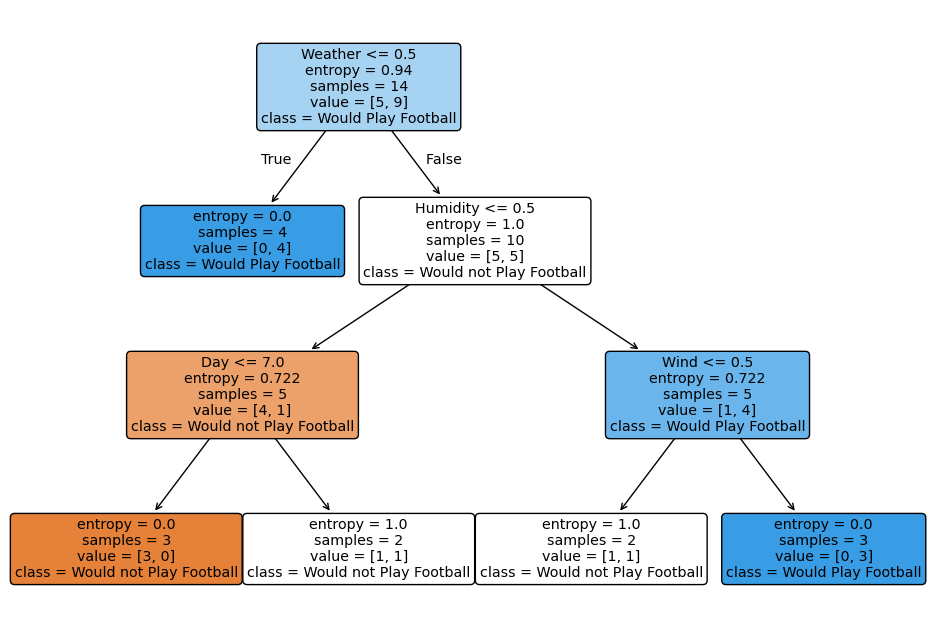

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plot_tree(DT,
          feature_names=X.columns,
          class_names=['Would not Play Football', 'Would Play Football'],
          filled=True,
          rounded=True)
plt.show()

In [ ]:
for feature, importance in zip(X.columns, DT.feature_importances_):
    print(f"{feature}: {importance}")

Day: 0.17564817475732297
Weather: 0.34526432126858786
Temperature: 0.0
Humidity: 0.30343932921676614
Wind: 0.17564817475732297
